This notebook aims at illustrating the bugs discussed in https://github.com/LSSTDESC/CLMM/issues/267
It is based on `CLMM/examples/demo_modeling_functionality.ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import clmm.modeling as mod
from astropy.cosmology import FlatLambdaCDM

In [5]:
astropy_cosmology_object = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)
cosmo_ccl = mod.cclify_astropy_cosmo(astropy_cosmology_object)

In [4]:
def plot_profile(r, profile_vals, profile_label='rho', label=None):
    plt.loglog(r, profile_vals, label=label)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

In [3]:
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass = 1.5e14
cluster_concentration = 4
z_cl = 0.2
z_source = 2
ngals = 1000

## Testing different radius types

In [31]:
r1 = 1.
r2 = 1
r3 = np.logspace(-2, 2, 100)
r4 = np.loadtxt("../tests/data/numcosmo/radial_profiles.txt", usecols = 0)
r5 = np.loadtxt("../tests/data/numcosmo/radial_profiles.txt")[:,0]

In [32]:
print ("r1 :", type(r1))
print ("r2 :", type(r2))
print ("r3 :", type(r3), "r3[0]:", type(r3[0]))
print ("r4 :", type(r4), "r4[0]:", type(r4[0]))
print ("r5 :", type(r5), "r5[0]:", type(r5[0]))

r1 : <class 'float'>
r2 : <class 'int'>
r3 : <class 'numpy.ndarray'> r3[0]: <class 'numpy.float64'>
r4 : <class 'numpy.ndarray'> r4[0]: <class 'numpy.float64'>
r5 : <class 'numpy.ndarray'> r5[0]: <class 'numpy.float64'>


## Testing impact of different radius types on the `get_3d_density` modeling function

### Comparison between `int` and `float`

In [40]:
rho1 = mod.get_3d_density(r1, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [41]:
print (rho1)

9021304102705.854


In [42]:
rho2 = mod.get_3d_density(r2, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [43]:
print (rho2)

9218868437227405312


###  => There is no warning but when the radius type is `int` instead of `float` the result is completely wrong.

### Comparison between different `'numpy.ndarray'`

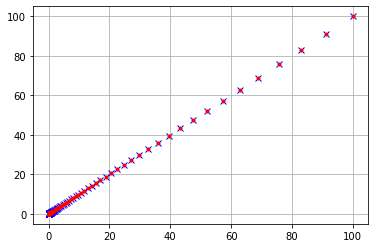

In [47]:
plt.plot(r3, r4, 'bx')
plt.plot(r3, r5, 'r.')
plt.grid()

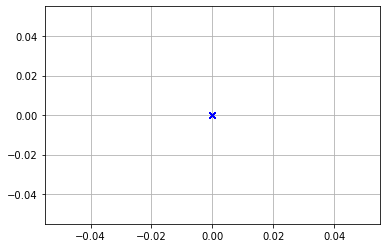

In [48]:
plt.plot(r3 - r5, r3 - r4, 'bx')
plt.grid()

###  => A priori, there is no differences betwen r3, r4 and r5

In [52]:
rho3 = mod.get_3d_density(r3, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [53]:
rho4 = mod.get_3d_density(r4, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [54]:
rho5 = mod.get_3d_density(r5, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

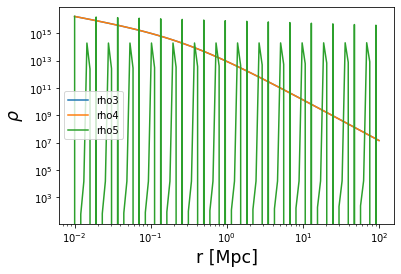

In [58]:
plot_profile(r3, rho3, '$\\rho$', "rho3")
plot_profile(r4, rho4, '$\\rho$', "rho4")
plot_profile(r5, rho5, '$\\rho$', "rho5")
plt.legend()

###  => There is no warning but with the definition of r5 the result is completely wrong.

## Testing impact of different radius types on the `predict_excess_surface_density` modeling function

In [61]:
mod.predict_excess_surface_density(r1, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array(36.52775256)

In [65]:
#uncoment to test that the kernel silently crashes
#mod.predict_excess_surface_density(r2, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
#                                              delta_mdef=mass_Delta, 
#                                              halo_profile_model=density_profile_parametrization)

In [62]:
mod.predict_excess_surface_density(r3, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array([1.88992497e+02, 1.88811953e+02, 1.88602705e+02, 1.88360524e+02,
       1.88080640e+02, 1.87757685e+02, 1.87385648e+02, 1.86957822e+02,
       1.86466760e+02, 1.85904232e+02, 1.85261196e+02, 1.84527775e+02,
       1.83693256e+02, 1.82746102e+02, 1.81673994e+02, 1.80463902e+02,
       1.79102191e+02, 1.77574761e+02, 1.75867244e+02, 1.73965233e+02,
       1.71854574e+02, 1.69521698e+02, 1.66954002e+02, 1.64140273e+02,
       1.61071141e+02, 1.57739546e+02, 1.54141208e+02, 1.50275079e+02,
       1.46143749e+02, 1.41753781e+02, 1.37115958e+02, 1.32245407e+02,
       1.27161601e+02, 1.21888196e+02, 1.16452727e+02, 1.10886148e+02,
       1.05222233e+02, 9.94968648e+01, 9.37472249e+01, 8.80109417e+01,
       8.23252160e+01, 7.67259744e+01, 7.12470826e+01, 6.59196539e+01,
       6.07714767e+01, 5.58265792e+01, 5.11049400e+01, 4.66223453e+01,
       4.23903841e+01, 3.84165687e+01, 3.47045615e+01, 3.12544863e+01,
       2.80633026e+01, 2.51252198e+01, 2.24321305e+01, 1.99740463e+01,
      

In [63]:
mod.predict_excess_surface_density(r4, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array([1.88992497e+02, 1.88811953e+02, 1.88602705e+02, 1.88360524e+02,
       1.88080640e+02, 1.87757685e+02, 1.87385648e+02, 1.86957822e+02,
       1.86466760e+02, 1.85904232e+02, 1.85261196e+02, 1.84527775e+02,
       1.83693256e+02, 1.82746102e+02, 1.81673994e+02, 1.80463902e+02,
       1.79102191e+02, 1.77574761e+02, 1.75867244e+02, 1.73965233e+02,
       1.71854574e+02, 1.69521698e+02, 1.66954002e+02, 1.64140273e+02,
       1.61071141e+02, 1.57739546e+02, 1.54141208e+02, 1.50275079e+02,
       1.46143749e+02, 1.41753781e+02, 1.37115958e+02, 1.32245407e+02,
       1.27161601e+02, 1.21888196e+02, 1.16452727e+02, 1.10886148e+02,
       1.05222233e+02, 9.94968648e+01, 9.37472249e+01, 8.80109417e+01,
       8.23252160e+01, 7.67259744e+01, 7.12470826e+01, 6.59196539e+01,
       6.07714767e+01, 5.58265792e+01, 5.11049400e+01, 4.66223453e+01,
       4.23903841e+01, 3.84165687e+01, 3.47045615e+01, 3.12544863e+01,
       2.80633026e+01, 2.51252198e+01, 2.24321305e+01, 1.99740463e+01,
      

In [64]:
#uncoment to test that the kernel silently crashes
#mod.predict_excess_surface_density(r5, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
#                                              delta_mdef=mass_Delta, 
#                                              halo_profile_model=density_profile_parametrization)

###  => There is no warning but with `int` or with the definition of r5, the function `predict_excess_surface_density` runs forever or silently crashes.